## Demonstrate data processing functionality

### Generate test images

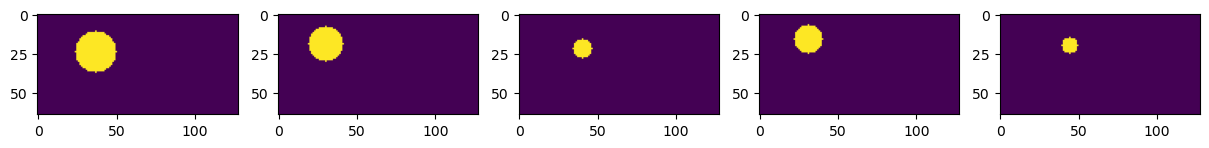

In [1]:
import numpy as np

import matplotlib.pyplot as plt


def generate_circle_images(num_images=10, image_size=64, min_radius=5, max_radius=15):
    images = []
    center_margin = image_size // 4  # restrict centers to the central region
    center_min = center_margin
    center_max = image_size - center_margin
    for _ in range(num_images):
        img = np.zeros((image_size, image_size * 2), dtype=np.float32)
        for _ in range(1):
            radius = np.random.randint(min_radius, max_radius)
            x_center = np.random.randint(center_min, center_max)
            y_center = np.random.randint(center_min, center_max)
            y, x = np.ogrid[:image_size, : image_size * 2]
            mask = (x - x_center) ** 2 + (y - y_center) ** 2 <= radius**2
            img[mask] = 1.0
        images.append(img)
    return images


# Example usage and visualization
images = generate_circle_images(num_images=5, image_size=64)
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for ax, img in zip(axs, images):
    ax.imshow(img)

### Process images without centering

crop ranges [[ 0 64]
 [ 0 90]]
(5, 64, 128)


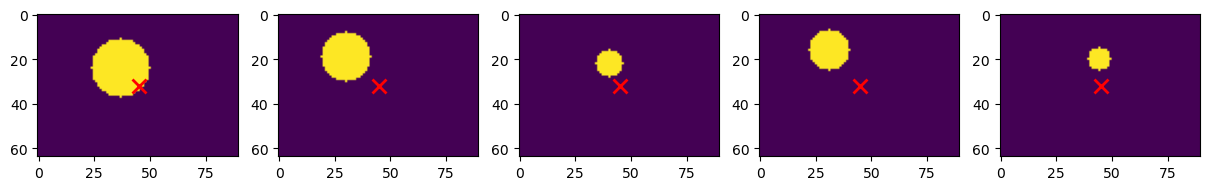

In [ ]:
## use process images
from gpsr.data_processing import process_images

processed_images, mesh = process_images(
    np.array(images),
    screen_resolution=1.0,
)

# Show the processed images
img_size = processed_images[0].shape
fig2, axs2 = plt.subplots(1, len(processed_images), figsize=(15, 3))
for ax, img in zip(axs2, processed_images):
    ax.imshow(img)
    ax.plot(img_size[1] / 2, img_size[0] / 2, "rx", markersize=10, markeredgewidth=2)

### Process images with centering

crop ranges [[21 42]
 [53 74]]
(5, 64, 128)


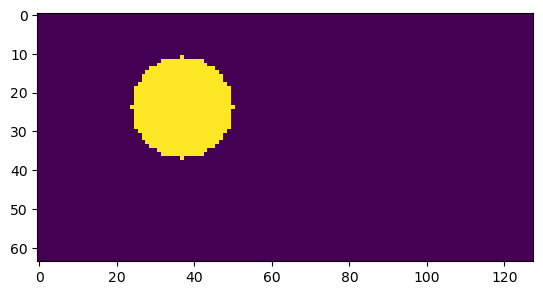

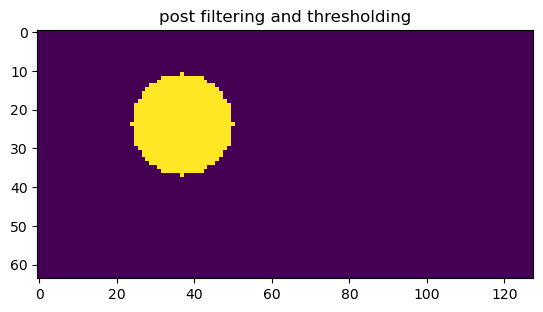

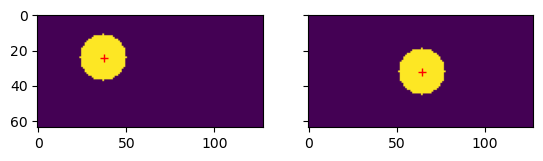

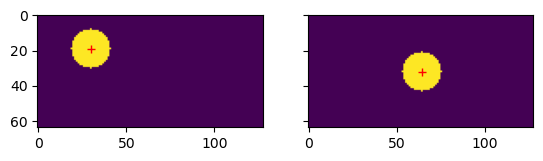

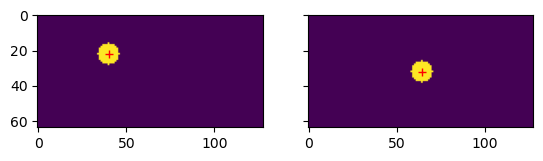

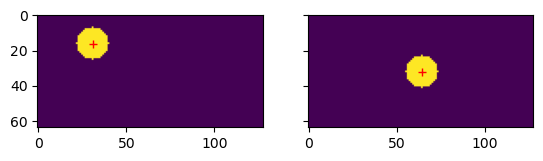

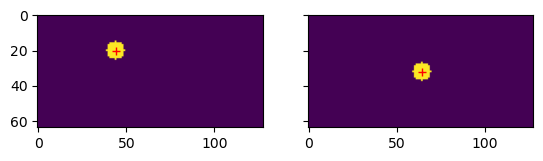

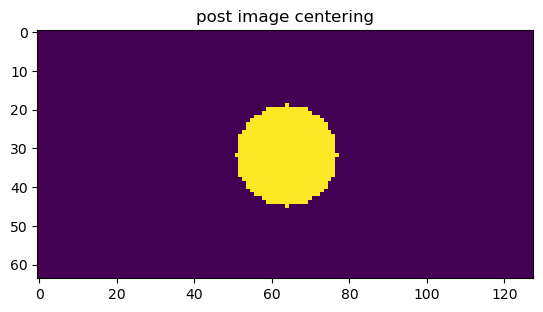

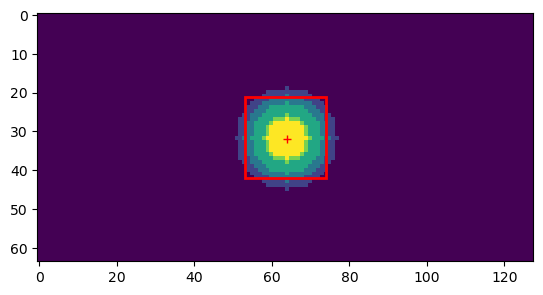

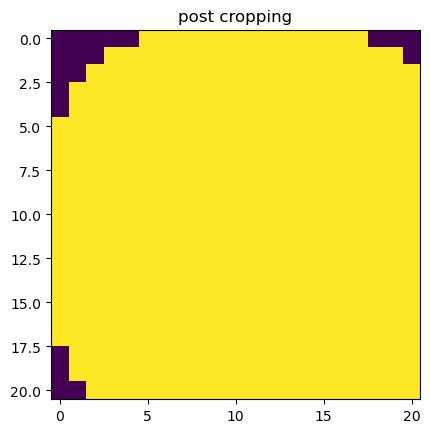

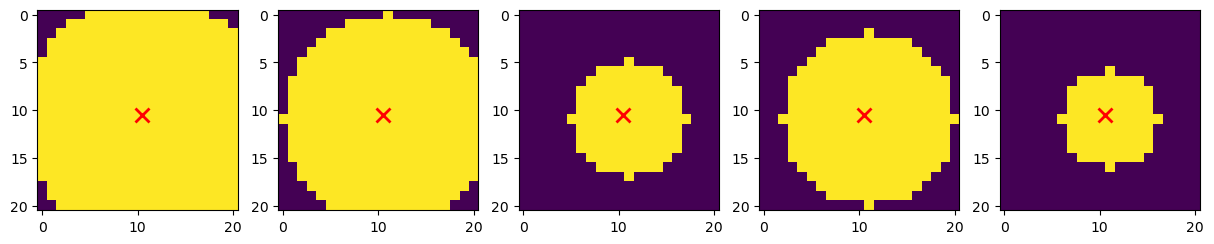

In [5]:
## use process images
from gpsr.data_processing import process_images

processed_images, mesh = process_images(
    np.array(images),
    screen_resolution=1.0,
    n_stds=2,
    center_images=True,
    visualize=True,
)

# Show the processed images
img_size = processed_images[0].shape
fig2, axs2 = plt.subplots(1, len(processed_images), figsize=(15, 3))
for ax, img in zip(axs2, processed_images):
    ax.imshow(img)
    ax.plot(img_size[1] / 2, img_size[0] / 2, "rx", markersize=10, markeredgewidth=2)